# CHALLENGING TASK 1

**Name :** Abhishek Singh

**Reg No :** 15BCE1009

## To Implement : SIFT FEATURE

In [42]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2, pickle, glob

from skimage import io
from sklearn.cluster import KMeans
from skimage.color import rgb2gray

import cv2
import cv2.xfeatures2d

from scipy.misc.pilutil import imresize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
path = 'image/'

In [70]:
def load_image_dir(path):
    images = []
    filenames = []
    for filename in os.listdir(path):
        filenames.append(filename)
        img = cv2.imread(os.path.join(path,filename),0)
        if img is not None:
            images.append(img)
    return images, filenames

In [71]:
def display(cv_image, title='Image'):
    """Convert OpenCV images from BGR to RGB for Pyplot"""
    #plt_image = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)
    plt.title(title)
    plt.imshow(cv_image, cmap='gray')
    plt.show()
    return None

## Loading the dataset of buses

In [72]:
images, filenames = load_image_dir(path)
print("Loaded {} images from {}".format(len(images), path))

Loaded 100 images from image/


In [73]:
img1 = images[0] # queryImage
img2 = images[1] # trainImage

**Initiate SIFT detector**

In [74]:
sift = cv2.xfeatures2d.SIFT_create()

**Find the keypoints and descriptors with SIFT**


In [75]:
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

**BFMatcher with default params**

In [76]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

**Apply ratio test**

In [77]:
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

## Example SIFT Feature Implementation

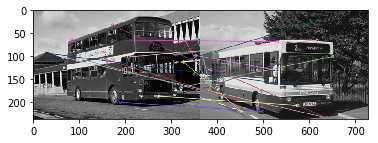

(<matplotlib.image.AxesImage at 0x7f861d9f1c88>, None)

In [78]:
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,img1,flags=2)

plt.imshow(img3),plt.show()

# Building the CBIR System

## Query Image

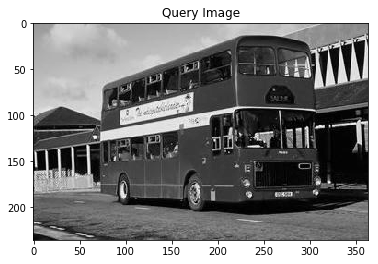

In [21]:
query = images[0]
display(query, 'Query Image')

In [55]:
database = 'buses/'
bins_array = [[8,8,8], [16,16,16], [32,32,32], [64,64,64]]

In [62]:
def descriptor(image):
    # compute a 3D histogram in the RGB colorspace,
    # then normalize the histogram so that images
    
    hist = cv2.calcHist([image], [0, 1, 2],
                        None, bins,
                        [0, 256, 0, 256, 0, 256])

    # return out 3D histogram as a flattened array
    return hist.flatten()

def indexor(save_index):

    index = {}

    # use glob to grab the image paths and loop over them
    for imagePath in glob.glob(database + "/*.*"):
        k = imagePath[imagePath.rfind("/") + 1:]

        # load the image, describe it using our RGB histogram
        # descriptor, and update the index

        image = cv2.imread(imagePath)
        features = descriptor(image)
        index[k] = features
    
    if save_index:
        with open('index', 'wb') as f:
            f.write(pickle.dumps(index))
    
    return index


bins = bins_array[0]
database = 'image/'
# index the database
index = indexor(False)


def _display(cv_image, title='Image'):
    
    """Convert OpenCV images from BGR to RGB for Pyplot"""
    
    plt_image = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)
    plt.title(title)
    plt.imshow(plt_image)
    plt.show()

    return True


def _sift(x, y, eps=1e-10):
    kp1, des1 = sift.detectAndCompute(x,None)
    kp2, des2 = sift.detectAndCompute(y,None)
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1,des2, k=2)
    d = matches[:]
    
    return d


def query(query, rank, precision_recall=False, relevant=None):

    """Performs an image query in the CBIR database"""
    
    print("Reading and analysing the query image...")
    query_image= cv2.imread(query)
    _display(cv_image=query_image, title='Query')
    
    #3D RGB histogram with 8 bins per channel
    
    query_features = descriptor(query_image)
    print("Wait while it's searching...")
    results = search(query_features)

    print("Hmm so the results are...")
    
    for j in range(rank):
        (score, imageName) = results[j]
        path = database + "/%s" % (imageName)
        result = cv2.imread(path)
        _display(result)

    if precision_recall == True and relevant is not None:
        result_images = [i[1] for i in results]
        relevant_ranks = sorted([result_images.index(x)+1 for x in relevant])
        num_relevant = range(len(relevant))
        precision = np.divide(num_relevant, relevant_ranks)
        recall = np.divide(num_relevant, len(relevant))
    
        # plot precision-recall curve
        
        plt.plot(recall, precision, 'r.-')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Graph for Bins : {}'.format(bins))
        plt.axis([0, 1, 0, 1.05])
        plt.show()

    return None

    
def search(query_features):
    results = {}

    for (k, features) in index.items():
        d = _sift(features, query_features)

        # how 'similar' the image in the index is to our query
    
        results[k] = d

    # sort our results, so that the smaller distances 
    
    results = sorted([(v, k) for (k, v) in results.items()])

    return results

## Precision & Recall  

Precision-Recall graphs measure the accuracy of our image retrieval system. They are also used in the performance measurement of any other search engine.

**Precision**  
Precision is the total relevant images retrieved from a collection of relevant and irrelevant images. It denotes how _precise_ the system is in accurately retreiving useful results from an impure or noisy collection of items. 
```
precision = relevant_items_retrieved / (relevant_items + irrelevant_items)
```

**Recall**  
Recall is the ratio of the relevant images retrieved to all the relevant images in the database. It denotes the how well the system _recalls_ the relevant images from the all the existing relevant images.  
```
recall = relevant_items_retrieved / total_relevant_items
```

Reading and analysing the query image...


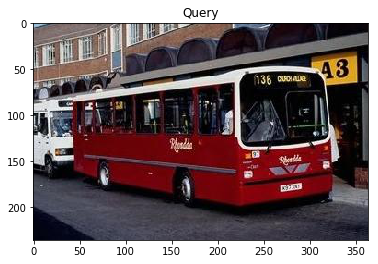

Wait while it's searching...
Hmm so the results are...


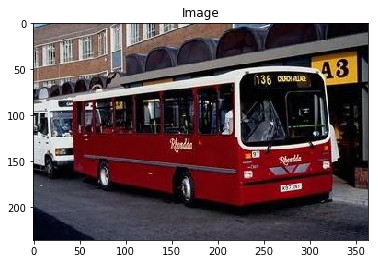

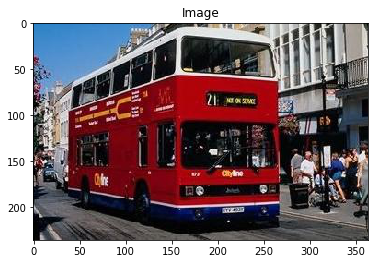

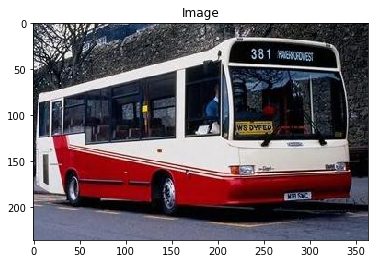

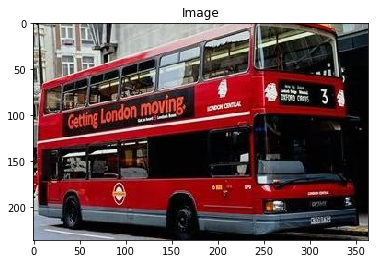

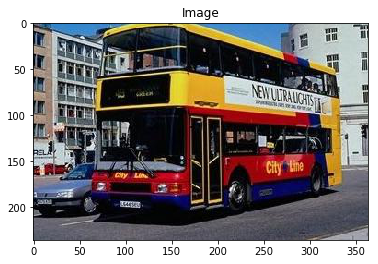

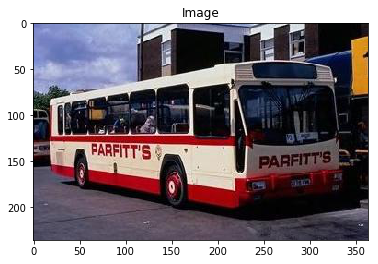

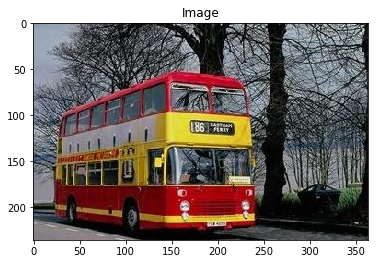

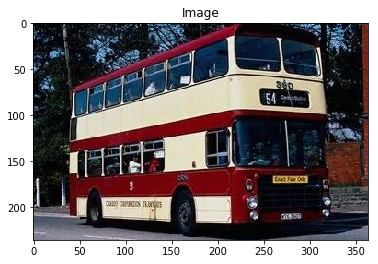

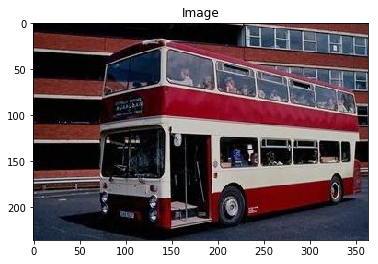

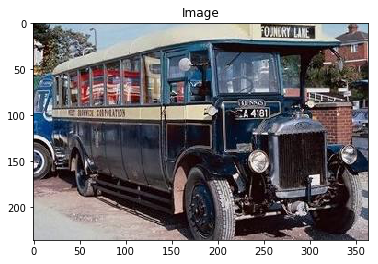

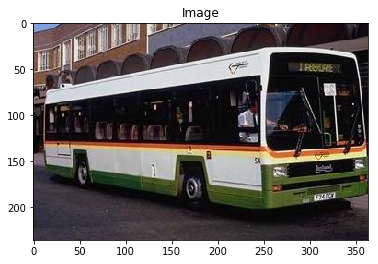

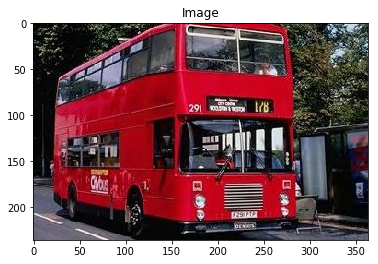

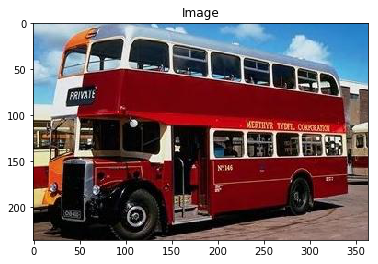

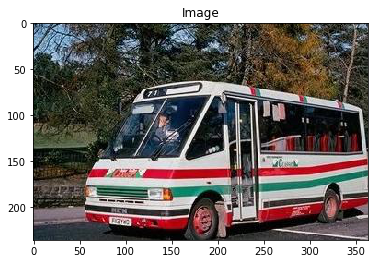

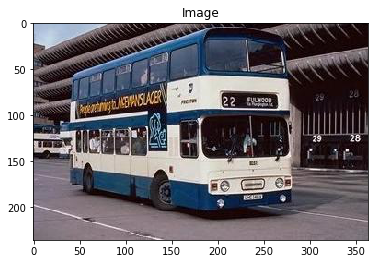

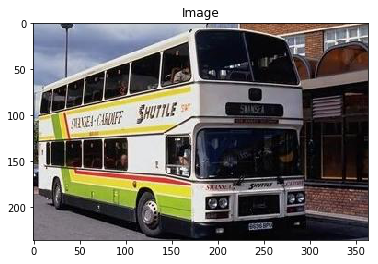

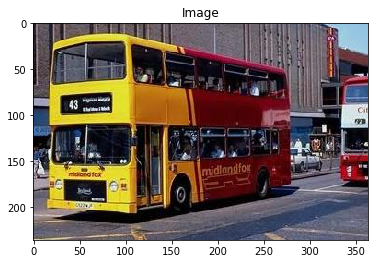

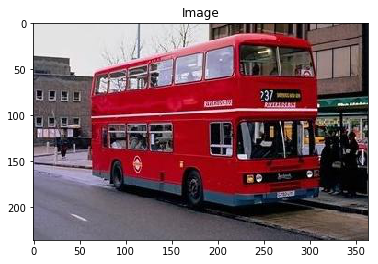

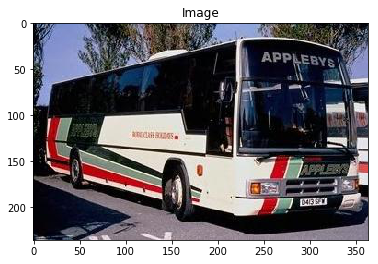

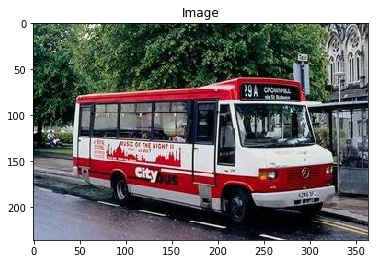

In [63]:
query('image/581000.jpg', 20)

Reading and analysing the query image...


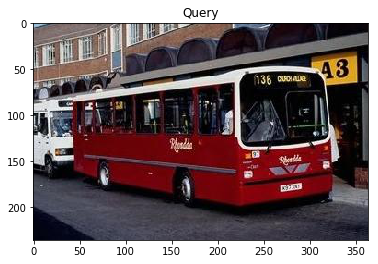

Wait while it's searching...
Hmm so the results are...


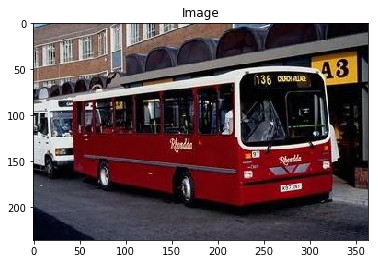

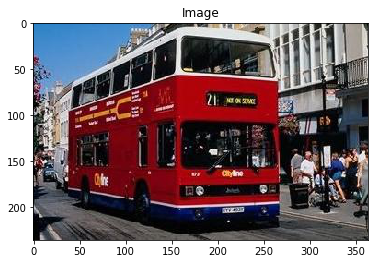

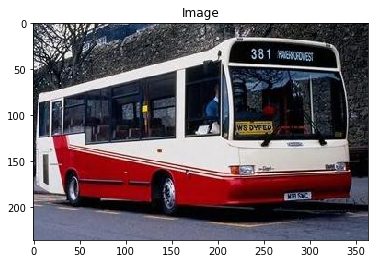

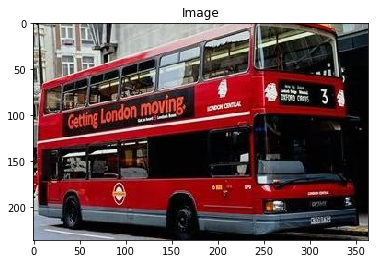

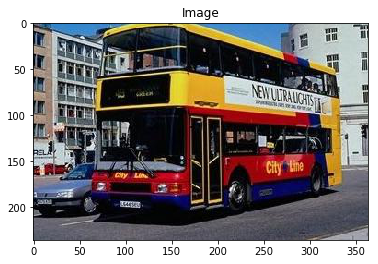

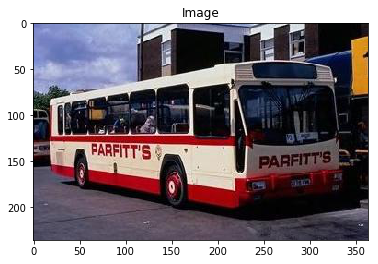

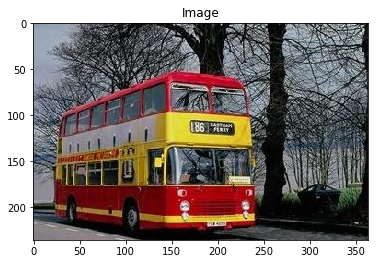

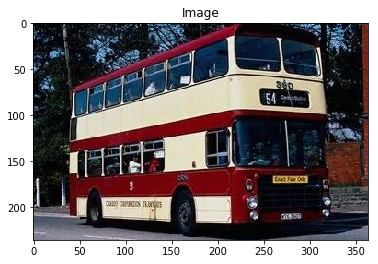

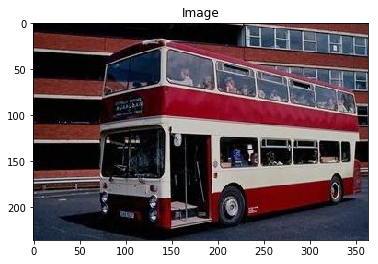

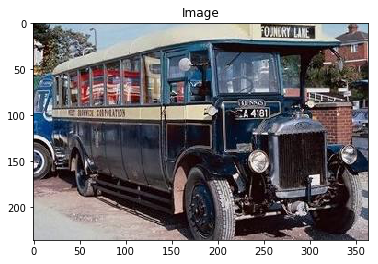

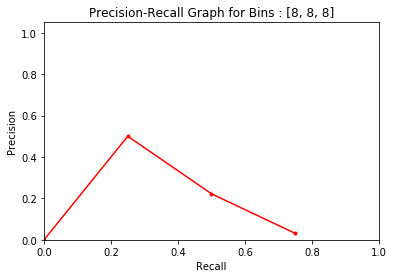

In [68]:
query(query='image/581000.jpg', rank=10,
             precision_recall=True,
             relevant=['581000.jpg', '581001.jpg', '581002.jpg', '581003.jpg'])